# Setup

In [ ]:
import pandas as pd
import numpy as np
import re

I added the following cell to gain access to the file in the google drive that I shared with you.

In [ ]:
from google.colab import drive

# https://stackoverflow.com/questions/48340341/how-to-read-csv-to-dataframe-in-google-colab

from google.colab import auth
auth.authenticate_user()

from pydrive.drive import GoogleDrive
from pydrive.auth import GoogleAuth
from oauth2client.client import GoogleCredentials
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Currently, I link to the sample image view.txt file that would be used in the following code. The uploaded file can be see under the 'content' folder if you go to Files.

It has a warning when first running this cell after I put the colab in our shared google drive, but the data and the following codes look good so I leave it here. If you run it again sometimes it would be good. If there are some problems in the future, I shall move back to my drive and just share the colab with you.

In [ ]:
sample_image_view_link = 'https://drive.google.com/file/d/10T3075hcJx8MZ5OrKbgeWHcf4ovvR_L8/view?usp=sharing'
id = sample_image_view_link.split('/')[-2]

myfile = drive.CreateFile({'id': id})
myfile.GetContentFile('image view.txt') 

I realize the following algorithm has great space to be improved and be more elegant by using some consice operations. So please feel free to edit it. 

# Load Image View Table

In [ ]:
image_view = pd.read_csv("image view.txt", delimiter="\t", names=["identifier", "provider", "title", "meta_data", "tags", "standardized_popularity"])
image_view.head()

,identifier,provider,title,meta_data,tags,standardized_popularity
0,0000d3d2-f84e-4a36-8b19-054f9a9a6435,flickr,OKScotland - 13th May 2010,"{""views"": ""0"", ""pub_date"": ""1273786159"", ""date...","[{""name"": ""okscotland"", ""provider"": ""flickr""}]",0.0
1,00008a09-c647-401c-942b-a6aeeeb80133,behance,Mikel Lovina Sportsfest 2013,"{""set"": ""https://www.behance.net/gallery/11169...","[{""name"": ""sportsfest"", ""provider"": ""behance""}...",NaN
2,000060a3-2a1e-4b61-9446-a6e71fdbddaa,behance,"Sports, video-editing, motion graphics and ani...","{""set"": ""https://www.behance.net/gallery/99524...","[{""name"": ""agency"", ""provider"": ""behance""}, {""...",NaN
3,00003203-eaaf-49ee-a417-7fe5f1356a54,behance,in summer sunlight,"{""set"": ""https://www.behance.net/gallery/97320...","[{""name"": ""Nature"", ""provider"": ""behance""}, {""...",NaN
4,0000402f-a571-4607-9f6a-5e818fec3edd,behance,Drawings,"{""set"": ""https://www.behance.net/gallery/36764...","[{""name"": ""handmade"", ""provider"": ""behance""}, ...",NaN


# Extract JSON objects

First examine how many different keys we have in tags:

In [ ]:
tags = image_view["tags"]
tags

0          [{"name": "okscotland", "provider": "flickr"}]
1       [{"name": "sportsfest", "provider": "behance"}...
2       [{"name": "agency", "provider": "behance"}, {"...
3       [{"name": "Nature", "provider": "behance"}, {"...
4       [{"name": "handmade", "provider": "behance"}, ...
                              ...                        
4324    [{"name": "on", "provider": "flickr"}, {"name"...
4325    [{"name": "1018", "provider": "flickr"}, {"nam...
4326    [{"name": "2019", "provider": "flickr"}, {"nam...
4327    [{"name": "allsoulschurch", "provider": "flick...
4328             [{"name": "2019", "provider": "flickr"}]
Name: tags, Length: 4329, dtype: object

In [ ]:
diff_tags_keys = []

In [ ]:
def find_diff_json_keys(lst):
    for n in pd.read_json(lst).columns:
        if n not in diff_tags_keys:
            diff_tags_keys.append(n)

In [ ]:
tags.apply(find_diff_json_keys)
diff_tags_keys

['name', 'provider', 'accuracy']

Since we have already had a provider column, we will only extract name and accuracy from tags.

In [ ]:
def tags_extract(lst):
    
    json_tbl = pd.read_json(lst)
    if "name" in json_tbl.columns:
        name_lst = list(json_tbl["name"])
        name_col.append(name_lst)
    else:
        name_col.append(None)
        
    if "accuracy" in json_tbl.columns:
        accuracy_lst = list(json_tbl["accuracy"])
        accuracy_col.append(accuracy_lst)
    else:
        accuracy_col.append(None)
    

In [ ]:
name_col = []
accuracy_col = []
tags.apply(tags_extract)
image_view["name"] = name_col
image_view["accuracy"] = accuracy_col
image_view

,identifier,provider,title,meta_data,tags,standardized_popularity,name,accuracy
0,0000d3d2-f84e-4a36-8b19-054f9a9a6435,flickr,OKScotland - 13th May 2010,"{""views"": ""0"", ""pub_date"": ""1273786159"", ""date...","[{""name"": ""okscotland"", ""provider"": ""flickr""}]",0.000000,[okscotland],None
1,00008a09-c647-401c-942b-a6aeeeb80133,behance,Mikel Lovina Sportsfest 2013,"{""set"": ""https://www.behance.net/gallery/11169...","[{""name"": ""sportsfest"", ""provider"": ""behance""}...",NaN,"[sportsfest, shirt, isolated, sleeve, casual, ...","[nan, 0.9973600000000001, 0.9889200000000001, ..."
2,000060a3-2a1e-4b61-9446-a6e71fdbddaa,behance,"Sports, video-editing, motion graphics and ani...","{""set"": ""https://www.behance.net/gallery/99524...","[{""name"": ""agency"", ""provider"": ""behance""}, {""...",NaN,"[agency, catalogues, brochures, graphics, cost...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,00003203-eaaf-49ee-a417-7fe5f1356a54,behance,in summer sunlight,"{""set"": ""https://www.behance.net/gallery/97320...","[{""name"": ""Nature"", ""provider"": ""behance""}, {""...",NaN,"[Nature, olive grove, Tuscany, sunlight, Lands...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,0000402f-a571-4607-9f6a-5e818fec3edd,behance,Drawings,"{""set"": ""https://www.behance.net/gallery/36764...","[{""name"": ""handmade"", ""provider"": ""behance""}, ...",NaN,"[handmade, creative, +Drawing+, black, art, fa...",None
...,...,...,...,...,...,...,...,...
4324,00005f45-402f-4cd5-93ae-789f65462ec7,flickr,IMG_9884,"{""views"": ""0"", ""pub_date"": ""1571405226"", ""date...","[{""name"": ""on"", ""provider"": ""flickr""}, {""name""...",0.000000,"[on, ontario, porthope, porthopeontario]",None
4325,0000387b-6c09-42a3-893f-12997e820f72,flickr,DSC02647,"{""views"": ""29"", ""pub_date"": ""1541607835"", ""dat...","[{""name"": ""1018"", ""provider"": ""flickr""}, {""nam...",0.395666,"[1018, 1018mm, a6300, alkjhgfds33, anita, chen...",None
4326,0000c695-7340-416b-9efc-188c83a82810,flickr,photo 1063 was taken at 10:38:29,"{""views"": ""71"", ""pub_date"": ""1574004547"", ""dat...","[{""name"": ""2019"", ""provider"": ""flickr""}, {""nam...",0.615816,"[2019, 595k, barrycornelius, oxonraces, radnag...",None
4327,000045ea-556a-42da-b7a1-7186637a6b6c,flickr,20091024-IMG_1285,"{""views"": ""72"", ""pub_date"": ""1256511956"", ""dat...","[{""name"": ""allsoulschurch"", ""provider"": ""flick...",0.619120,"[allsoulschurch, jenniferdorn, kenambrose, was...",None


As you may see in the accuracy column, we have None and nan. Generally, None happens when we have no accuracy data for the image. nan happens when a JSON object in the tags of the image has only name element and no accuracy element. I am not very clear with what accuracy really is. So I decide to leave it as this for now and not to do any imputation or null removal.

The following code is try to print the first ith rows in a cleaner format

In [ ]:
rows_to_display = 100
row_counter = 0

for i in image_view["name"]:
    if row_counter >= rows_to_display:
        break
    print("Row" + str(row_counter), i)
    print("\n")
    row_counter += 1

Row0 ['okscotland']


Row1 ['sportsfest', 'shirt', 'isolated', 'sleeve', 'casual', 'fashion', 'illustration', 'cotton', 'wear', 'polo', 'design', 'vector', 'man', 'shop', 'apparel', 'template', 'garment', 'desktop', 'tee', 'shopping', 'no person']


Row2 ['agency', 'catalogues', 'brochures', 'graphics', 'cost-effective', 'Sponsorship', 'screens', 'magazines', 'Leisure', 'Vehicle', 'cardiff', 'programmes', 'bridgend', 'large', 'monmouth', 'Agencies', 'consultancy', 'creative', 'video-editing', 'online', 'man', 'people', 'adult', 'desktop', 'person', 'business', 'young', 'portrait', 'one', 'woman', 'technology', 'isolated', 'face', 'girl', 'work', 'office', 'actor', 'human', 'beautiful', 'monochrome']


Row3 ['Nature', 'olive grove', 'Tuscany', 'sunlight', 'Landscape', 'Evening', 'Italy', 'Wildflowers', 'Flowers', 'nature', 'flower', 'no person', 'summer', 'flora', 'leaf', 'outdoors', 'grass', 'sun', 'bright', 'rural', 'closeup', 'growth', 'fair weather', 'field', 'wild', 'garden', 'colo

In [ ]:
rows_to_display = 100
row_counter = 0

for i in image_view["accuracy"]:
    if row_counter >= rows_to_display:
        break
    print("Row" + str(row_counter), i)
    print("\n")
    row_counter += 1

Row0 None


Row1 [nan, 0.9973600000000001, 0.9889200000000001, 0.9882000000000001, 0.98567, 0.98377, 0.9815, 0.9813900000000001, 0.9795300000000001, 0.9778600000000001, 0.9692200000000001, 0.96242, 0.95959, 0.9576600000000001, 0.9520700000000001, 0.9483600000000001, 0.9463300000000001, 0.94105, 0.9394, 0.93788, 0.9256900000000001]


Row2 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.9690500000000001, 0.9572200000000001, 0.95691, 0.9538500000000001, 0.9388000000000001, 0.9316700000000001, 0.9175800000000001, 0.8968300000000001, 0.89495, 0.8901500000000001, 0.87699, 0.8615800000000001, 0.85113, 0.8369200000000001, 0.8263400000000001, 0.8172900000000001, 0.8132900000000001, 0.8095, 0.8061100000000001, 0.8060900000000001]


Row3 [nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.9927900000000001, 0.9899600000000001, 0.98228, 0.97889, 0.9683600000000001, 0.9585, 0.9476100000000001, 0.9464800000000001, 0.9350200000000001, 0.93376, 0.93348

# Exploration on entries with valid standardized popularity

Let's first see how many entries in our dataset have standardized popularity defined.

In [ ]:
image_view

,identifier,provider,title,meta_data,tags,standardized_popularity,name,accuracy
0,0000d3d2-f84e-4a36-8b19-054f9a9a6435,flickr,OKScotland - 13th May 2010,"{""views"": ""0"", ""pub_date"": ""1273786159"", ""date...","[{""name"": ""okscotland"", ""provider"": ""flickr""}]",0.000000,[okscotland],None
1,00008a09-c647-401c-942b-a6aeeeb80133,behance,Mikel Lovina Sportsfest 2013,"{""set"": ""https://www.behance.net/gallery/11169...","[{""name"": ""sportsfest"", ""provider"": ""behance""}...",NaN,"[sportsfest, shirt, isolated, sleeve, casual, ...","[nan, 0.9973600000000001, 0.9889200000000001, ..."
2,000060a3-2a1e-4b61-9446-a6e71fdbddaa,behance,"Sports, video-editing, motion graphics and ani...","{""set"": ""https://www.behance.net/gallery/99524...","[{""name"": ""agency"", ""provider"": ""behance""}, {""...",NaN,"[agency, catalogues, brochures, graphics, cost...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,00003203-eaaf-49ee-a417-7fe5f1356a54,behance,in summer sunlight,"{""set"": ""https://www.behance.net/gallery/97320...","[{""name"": ""Nature"", ""provider"": ""behance""}, {""...",NaN,"[Nature, olive grove, Tuscany, sunlight, Lands...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,0000402f-a571-4607-9f6a-5e818fec3edd,behance,Drawings,"{""set"": ""https://www.behance.net/gallery/36764...","[{""name"": ""handmade"", ""provider"": ""behance""}, ...",NaN,"[handmade, creative, +Drawing+, black, art, fa...",None
...,...,...,...,...,...,...,...,...
4324,00005f45-402f-4cd5-93ae-789f65462ec7,flickr,IMG_9884,"{""views"": ""0"", ""pub_date"": ""1571405226"", ""date...","[{""name"": ""on"", ""provider"": ""flickr""}, {""name""...",0.000000,"[on, ontario, porthope, porthopeontario]",None
4325,0000387b-6c09-42a3-893f-12997e820f72,flickr,DSC02647,"{""views"": ""29"", ""pub_date"": ""1541607835"", ""dat...","[{""name"": ""1018"", ""provider"": ""flickr""}, {""nam...",0.395666,"[1018, 1018mm, a6300, alkjhgfds33, anita, chen...",None
4326,0000c695-7340-416b-9efc-188c83a82810,flickr,photo 1063 was taken at 10:38:29,"{""views"": ""71"", ""pub_date"": ""1574004547"", ""dat...","[{""name"": ""2019"", ""provider"": ""flickr""}, {""nam...",0.615816,"[2019, 595k, barrycornelius, oxonraces, radnag...",None
4327,000045ea-556a-42da-b7a1-7186637a6b6c,flickr,20091024-IMG_1285,"{""views"": ""72"", ""pub_date"": ""1256511956"", ""dat...","[{""name"": ""allsoulschurch"", ""provider"": ""flick...",0.619120,"[allsoulschurch, jenniferdorn, kenambrose, was...",None


It's self-explanatory that entries with Nan do not have defined standardized popularity.

In [ ]:
image_view["standardized_popularity"].notnull()

0        True
1       False
2       False
3       False
4       False
        ...  
4324     True
4325     True
4326     True
4327     True
4328     True
Name: standardized_popularity, Length: 4329, dtype: bool

In [ ]:
image_view_sp_no_Nan = image_view[image_view["standardized_popularity"].notnull()]
image_view_sp_no_Nan

,identifier,provider,title,meta_data,tags,standardized_popularity,name,accuracy
0,0000d3d2-f84e-4a36-8b19-054f9a9a6435,flickr,OKScotland - 13th May 2010,"{""views"": ""0"", ""pub_date"": ""1273786159"", ""date...","[{""name"": ""okscotland"", ""provider"": ""flickr""}]",0.000000,[okscotland],None
62,0000674a-67d0-4bc0-bdae-43941d334819,flickr,IMG_6984,"{""views"": ""0"", ""pub_date"": ""1499184677"", ""date...","[{""name"": ""wa"", ""provider"": ""flickr""}, {""name""...",0.000000,"[wa, washington]",None
63,00003eb2-dfc0-4d02-b42a-dc305520227e,flickr,IMG_3597,"{""views"": ""0"", ""pub_date"": ""1437561179"", ""date...","[{""name"": ""june2015"", ""provider"": ""flickr""}]",0.000000,[june2015],None
107,00009236-c5e4-4f9a-87ad-233df6a177c0,flickr,19022029_1289125634541866_1475748279_n.jpg,"{""views"": ""0"", ""pub_date"": ""1499830269"", ""date...","[{""name"": ""nhadatvideo"", ""provider"": ""flickr""}]",0.000000,[nhadatvideo],None
108,0000f94c-e4dd-4937-9dbe-a4f0a5aa4c2a,flickr,Mahler: Das Lied von der Erde (Arranged by Sch...,"{""views"": ""0"", ""pub_date"": ""1574541824"", ""date...","[{""name"": ""by"", ""provider"": ""flickr""}, {""name""...",0.000000,"[by, das, der, erde, lied, von]",None
...,...,...,...,...,...,...,...,...
4324,00005f45-402f-4cd5-93ae-789f65462ec7,flickr,IMG_9884,"{""views"": ""0"", ""pub_date"": ""1571405226"", ""date...","[{""name"": ""on"", ""provider"": ""flickr""}, {""name""...",0.000000,"[on, ontario, porthope, porthopeontario]",None
4325,0000387b-6c09-42a3-893f-12997e820f72,flickr,DSC02647,"{""views"": ""29"", ""pub_date"": ""1541607835"", ""dat...","[{""name"": ""1018"", ""provider"": ""flickr""}, {""nam...",0.395666,"[1018, 1018mm, a6300, alkjhgfds33, anita, chen...",None
4326,0000c695-7340-416b-9efc-188c83a82810,flickr,photo 1063 was taken at 10:38:29,"{""views"": ""71"", ""pub_date"": ""1574004547"", ""dat...","[{""name"": ""2019"", ""provider"": ""flickr""}, {""nam...",0.615816,"[2019, 595k, barrycornelius, oxonraces, radnag...",None
4327,000045ea-556a-42da-b7a1-7186637a6b6c,flickr,20091024-IMG_1285,"{""views"": ""72"", ""pub_date"": ""1256511956"", ""dat...","[{""name"": ""allsoulschurch"", ""provider"": ""flick...",0.619120,"[allsoulschurch, jenniferdorn, kenambrose, was...",None


As we can see, after we remove entries with Null standardized popularity. Many of entries have standardized popularity = 0. I here assume we can safely categorize the entry with sp=0 as the entry with no defined standardized popularity. But it turns out this approach is not good. 0 does have a meaning such as the case an image has no views.

In [ ]:
image_view_sp_defined = image_view_sp_no_Nan[image_view_sp_no_Nan["standardized_popularity"]>=0]
image_view_sp_defined

,identifier,provider,title,meta_data,tags,standardized_popularity,name,accuracy
0,0000d3d2-f84e-4a36-8b19-054f9a9a6435,flickr,OKScotland - 13th May 2010,"{""views"": ""0"", ""pub_date"": ""1273786159"", ""date...","[{""name"": ""okscotland"", ""provider"": ""flickr""}]",0.000000,[okscotland],None
62,0000674a-67d0-4bc0-bdae-43941d334819,flickr,IMG_6984,"{""views"": ""0"", ""pub_date"": ""1499184677"", ""date...","[{""name"": ""wa"", ""provider"": ""flickr""}, {""name""...",0.000000,"[wa, washington]",None
63,00003eb2-dfc0-4d02-b42a-dc305520227e,flickr,IMG_3597,"{""views"": ""0"", ""pub_date"": ""1437561179"", ""date...","[{""name"": ""june2015"", ""provider"": ""flickr""}]",0.000000,[june2015],None
107,00009236-c5e4-4f9a-87ad-233df6a177c0,flickr,19022029_1289125634541866_1475748279_n.jpg,"{""views"": ""0"", ""pub_date"": ""1499830269"", ""date...","[{""name"": ""nhadatvideo"", ""provider"": ""flickr""}]",0.000000,[nhadatvideo],None
108,0000f94c-e4dd-4937-9dbe-a4f0a5aa4c2a,flickr,Mahler: Das Lied von der Erde (Arranged by Sch...,"{""views"": ""0"", ""pub_date"": ""1574541824"", ""date...","[{""name"": ""by"", ""provider"": ""flickr""}, {""name""...",0.000000,"[by, das, der, erde, lied, von]",None
...,...,...,...,...,...,...,...,...
4324,00005f45-402f-4cd5-93ae-789f65462ec7,flickr,IMG_9884,"{""views"": ""0"", ""pub_date"": ""1571405226"", ""date...","[{""name"": ""on"", ""provider"": ""flickr""}, {""name""...",0.000000,"[on, ontario, porthope, porthopeontario]",None
4325,0000387b-6c09-42a3-893f-12997e820f72,flickr,DSC02647,"{""views"": ""29"", ""pub_date"": ""1541607835"", ""dat...","[{""name"": ""1018"", ""provider"": ""flickr""}, {""nam...",0.395666,"[1018, 1018mm, a6300, alkjhgfds33, anita, chen...",None
4326,0000c695-7340-416b-9efc-188c83a82810,flickr,photo 1063 was taken at 10:38:29,"{""views"": ""71"", ""pub_date"": ""1574004547"", ""dat...","[{""name"": ""2019"", ""provider"": ""flickr""}, {""nam...",0.615816,"[2019, 595k, barrycornelius, oxonraces, radnag...",None
4327,000045ea-556a-42da-b7a1-7186637a6b6c,flickr,20091024-IMG_1285,"{""views"": ""72"", ""pub_date"": ""1256511956"", ""dat...","[{""name"": ""allsoulschurch"", ""provider"": ""flick...",0.619120,"[allsoulschurch, jenniferdorn, kenambrose, was...",None


In [ ]:
sp_defined_rate = image_view_sp_defined.shape[0] / image_view.shape[0]
print("Out of " + str(round(sp_defined_rate*100, 3)) + "% of the sample has defined standardized popularity")

Out of 89.027% of the sample has defined standardized popularity


This percentage is as expected

Now let's further dive into the standardized popularity to see if there are any unusual values.

In [ ]:
sp_type = [type(i)== float for i in image_view_sp_defined["standardized_popularity"]]

In [ ]:
print("All defined standardized popularity is a float value?", all(sp_type))

All defined standardized popularity is a float value? True


In [ ]:
print("The max standardized popularity score in our sample is ", max(image_view_sp_defined["standardized_popularity"]))

The max standardized popularity score in our sample is  0.999159269804053


In [ ]:
print("The min standardized popularity score in our sample is ", min(image_view_sp_defined["standardized_popularity"]))

The min standardized popularity score in our sample is  0.0


It's important to check if we have some non-null but also non-numerical value in the dataset. Luckily, we don't. The max and min makes sense since our standardized popularity score should be in the interval between 0 and 1. So it seems that the value is in the correct range.

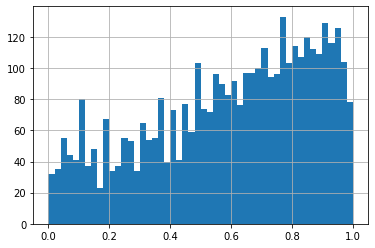

In [ ]:
image_view_sp_defined["standardized_popularity"].hist(bins=50)

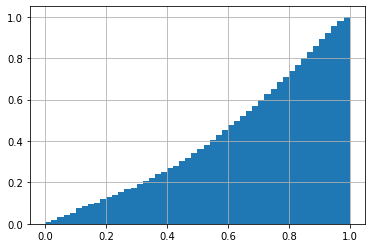

In [ ]:
image_view_sp_defined["standardized_popularity"].hist(density=True, bins=50, cumulative=True)

# Cleaning on tag names and transfer them into proper inputs.

We find that a lot of taglists contain tags beginning with 'u[0-9]' or '\u[0-9]'. Those are unicodes and have no actual meaning.

So here we try to remove those tags.

In [ ]:
copy = image_view_sp_defined['name'].copy()
for taglist in copy:
  list_to_remove = []
  for tag in taglist:
    if re.match(r"u[0-9].*u[0-9].*", str(tag)) or re.match(r"\\u[0-9].*\\u[0-9].*", str(tag)):
      list_to_remove.append(tag)
  for ele in list_to_remove:
    taglist.remove(ele)

Transform the 'name' column of image_view into proper input

In [ ]:
#The input shall be a list of strings
proper_tagStr = []

#Change each row of 'name' to a string
for row in image_view_sp_defined['name']:
    trans_row = ' '.join([str(elem) for elem in row])
    proper_tagStr.append(trans_row)

    
#First five strings of the input
proper_tagStr[:5]

['okscotland',
 'wa washington',
 'june2015',
 'nhadatvideo',
 'by das der erde lied von']

Then check the length of each taglist.

Here we print out the taglists that have length bigger than 400.

In [ ]:
for i in range(len(proper_tagStr)):
  if len(proper_tagStr[i]) > 400:
    print(str(i), 'len:', len(proper_tagStr[i]))
    print(proper_tagStr[i])

305 len: 792
cronistaoficialdelavillademadridejos fotografu00edahumanistaydocumental fototeca jmmg josemariamorenogarcia josemariamorenogarciatumblrcom madridejos madridejosfotoses picasawebgooglecomjosemariamorenogarcia sansebastian2016patrondemadridejos sansebastiu00e1npatru00f3ndemadridejosconcentraciu00f3ndelosquintosporteadoresrevistadetropashomenajealabanderayeucaristu00eda toledo www500pxcomjosemariamorenogarcia wwwfacebookcomjosemariamorenogarcia wwwflickrcomjosemariamorenogarcia wwwflickrivercomjosemariamorenogarcia wwwfluidrcomjosemariamorenogarcia wwwgigapanorgjosemariamorenogarcia wwwjosemariamorenogarciaes wwwmadridejosnet wwwmyspacecommadridejosnet wwwphotosynthnetmadridejos wwwtwittercomfotosmoreno wwwvimeocommadridejos wwwwordpresscomjosemariamorenogarcia wwwyoutubecommadridejos
489 len: 424
asturiano asturianu asturias asturies cao conceyuabiertupolaoficialidu00e1 derechosciviles derechosllingu00fcu00edsticos doilacara estatutu federacionsocialistaasturiana fsa gallego

Notice now the length of taglists is cut off by a lot and most unicodes are cut.

# Vectorize Using sklearn

First import sklearn package

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Use CountVectorizer feature to vectorize taglists.

In [ ]:
vectorizer = CountVectorizer()
vectorized_tags = vectorizer.fit_transform(proper_tagStr)

There are a lot of different tag names found, so the dimension of our matrix is too big to show any details.

In [ ]:
print('Number of different tag names: ', len(vectorizer.get_feature_names()))
print('The matrix of token counts: \n', vectorized_tags.toarray())

Number of different tag names:  16800
The matrix of token counts: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Vectorize Using Bert Embeddings Part 1


In [ ]:
proper_tagStr[0:5]

['okscotland',
 'wa washington',
 'june2015',
 'nhadatvideo',
 'by das der erde lied von']

First install pytorch-pretrained-bert and import various Bert packages.

In [ ]:
!pip install pytorch-pretrained-bert
!pip install urllib3==1.25.10
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

     |████████████████████████████████| 133kB 11.1MB/s 
     |████████████████████████████████| 133kB 15.9MB/s 
     |████████████████████████████████| 6.9MB 13.0MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
ERROR: botocore 1.19.25 has requirement urllib3<1.27,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24.3 which is incompatible.
     |████████████████████████████████| 133kB 11.0MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


100%|██████████| 231508/231508 [00:00<00:00, 697678.96B/s]


Now we check the type of GPU this colab is using. It is Tesla T4.

In [ ]:
torch.cuda.get_device_name(0)

'Tesla K80'

Now we first evaluate the bert model.

In [ ]:
# Load pre-trained model (weights)
model = BertModel.from_pretrained('bert-base-uncased')

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()

100%|██████████| 407873900/407873900 [00:14<00:00, 28377821.17B/s]


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Lin

Here, we define a function that takes one sentence, in the format of a string, as an input and output the encoded layers of the sentence using bert model.
(Feel free to command the printing statement)

In [ ]:
def get_encoded_layers(sentence):
  # Tokenize our sentence with the BERT tokenizer.
  tokenized_text = tokenizer.tokenize(sentence)

  # Print out the tokens.
  #print (tokenized_text)


  # Map the token strings to their vocabulary indeces.
  indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

  # Display the words with their indeces.
  #for tup in zip(tokenized_text, indexed_tokens):
  #  print('{:<12} {:>6,}'.format(tup[0], tup[1]))


  # Mark each of the tokens as belonging to sentence "1".
  segments_ids = [1] * len(tokenized_text)


  # Convert inputs to PyTorch tensors
  tokens_tensor = torch.tensor([indexed_tokens])
  segments_tensors = torch.tensor([segments_ids])

  # Predict hidden states features for each layer
  with torch.no_grad():
      encoded_layers, _ = model(tokens_tensor, segments_tensors)

  # Display the shape of encoded_layers
  #print_layer_shapes(encoded_layers)

  return encoded_layers

The full set of hidden states for this model is stored in the object encoded_layers.
This object has four dimensions, in the following order:

1. The layer number

2. The batch number (1 sentence)

3. The word / token number

4. The hidden unit / feature number

The following function prints out the length of four dimensions of the encoded_layers object.


In [ ]:
def print_layer_shapes(encoded_layers):
  print ("Number of layers:", len(encoded_layers))
  layer_i = 0

  print ("Number of batches:", len(encoded_layers[layer_i]))
  batch_i = 0

  print ("Number of tokens:", len(encoded_layers[layer_i][batch_i]))
  token_i = 0

  print ("Number of hidden units:", len(encoded_layers[layer_i][batch_i][token_i]))

In [ ]:
def get_num_of_tokens(encoded_layers):
  return len(encoded_layers[0][0])

Now we can try embedding the first hundred "tag sentences" in proper_tagStr we defined before. We store each encoded layers object in the list list_of_encoded_layers.

In [ ]:
len(proper_tagStr)

3854

In [ ]:
list_of_encoded_layers = []
standardized_pop = []

import time
start = time.perf_counter()

number_of_entry_to_encode = 4000
for index in range(len(proper_tagStr[:number_of_entry_to_encode])):
  if not proper_tagStr[index] == '':
    list_of_encoded_layers.append(get_encoded_layers(proper_tagStr[index]))
    standardized_pop.append(image_view_sp_defined['standardized_popularity'].iloc[index])
  #print("\n")

end = time.perf_counter()
print("This cell takes " + str(end-start) + " seconds to run")

In [ ]:
len(list_of_encoded_layers) #should return value of number_of_entry_to_encode

Notice that if we do 100 taglists, it take only 10ish seconds.

In [ ]:
ttl = 0
for encoded_layer in list_of_encoded_layers:
  ttl += get_num_of_tokens(encoded_layer)
print(ttl)

#[Deprecated] Feed Bert Model with Combined Sentences

In [ ]:
#What if we combine all tags into one sentence and feed it into the model? Will it be faster?
combined_sentence = ""
for p in proper_tagStr[:10]:
  combined_sentence += p
  combined_sentence += " "
print(combined_sentence)

In [ ]:
combined_sentence_encoded = get_encoded_layers(combined_sentence)
print_layer_shapes(combined_sentence_encoded)

This way is indeed faster. And we do get 343 tokens as expected. Now we need to remmeber to change mask text, add CLE SEP labels and maybe change the approach to single vector a little bit

In [ ]:
import time
start = time.perf_counter()
all_sample_combined_sentence = proper_tagStr[0]
for p in proper_tagStr[1:number_of_entry_to_encode]:
  all_sample_combined_sentence += " "
  all_sample_combined_sentence += p

all_sample_combined_sentence_encoded = get_encoded_layers(all_sample_combined_sentence)
print_layer_shapes(all_sample_combined_sentence_encoded)

end = time.perf_counter()
print("This cell takes " + str(end-start) + " seconds to run")

However if we increase samples, it will go over the max of tokens bert embedding can hold which is 512. Say we everytime, bert can handle 15 samples. Say we have 4.5 million entries. In current sample, we have 4000 entries. It takes at least 35 mins to calculate all 4000 entries. It takes around 28 days to process 4.5 million entries if we run uninterruptedly.

Now let's compare the time difference between feed sentence one by one vs feed a combined sentence:

In [ ]:
number_of_entry_to_encode=10
import time
start = time.perf_counter()
for i in range(0, 10):
  all_sample_combined_sentence = proper_tagStr[i*number_of_entry_to_encode]
  for p in proper_tagStr[i*number_of_entry_to_encode+1:(i+1)*number_of_entry_to_encode]:
    all_sample_combined_sentence += " "
    all_sample_combined_sentence += p

  all_sample_combined_sentence_encoded = get_encoded_layers(all_sample_combined_sentence)
  print_layer_shapes(all_sample_combined_sentence_encoded)

end = time.perf_counter()
print("This cell takes " + str(end-start) + " seconds to run")

This is faster than feed in one by one. However, to ensure this approach works we have to guarantee that total number of words in every 10 entries need to be lower than the upper limit (512) that Bert Model has. Moreover, we also need to pay more time on CLE and SEP and marking sentences and extract the mean vector. Therefore, it might not be very economic. I will reserve this method to be invoke when we hit another runtime bottleneck where one by one feeding approach doesn't work.

#Vectorize using Bert Model Part 2

To get a single vector for our entire sentence we have multiple application-dependent strategies, but a simple approach is to average the second to last hiden layer of each token producing a single 768 length vector.

Here we put each sentence vector into the list list_of_sentence_embedding.

In [ ]:
list_of_sentence_embedding = []
for encoded_layers in list_of_encoded_layers:
  # `token_vecs` is a tensor with shape [Number of tokens x Number of hidden units]
  token_vecs = encoded_layers[11][0]

  # Calculate the average of all token vectors.
  sentence_embedding = torch.mean(token_vecs, dim=0)

  list_of_sentence_embedding.append(sentence_embedding)

The following shows an example of how the values embedding in the first tag lists look like.

In [ ]:
print(list_of_sentence_embedding[0])

tensor([-2.7818e-01,  6.7193e-02,  6.0001e-01,  4.0286e-03,  1.4117e-02,
         2.8052e-01, -5.1397e-01, -3.4226e-01,  4.3888e-01, -2.1767e-01,
         2.0853e-02,  1.6242e-01,  1.4813e-01,  2.0162e-01, -1.3357e-01,
         7.5658e-01, -2.7704e-01, -4.5248e-01, -3.1910e-01, -5.3740e-01,
         4.0843e-01, -5.0926e-01, -1.3549e-01,  2.3052e-02,  5.0628e-01,
        -1.3807e-01,  7.6384e-01, -2.6883e-01,  2.9147e-01,  4.9686e-01,
         2.6273e-01, -4.2408e-02, -1.3139e-01,  3.4520e-01,  6.5523e-02,
         5.2596e-01,  6.4495e-01,  1.8682e-01,  2.8612e-01, -2.2547e-01,
        -1.2276e-01, -4.7425e-02,  2.0477e-01,  1.1897e-01,  2.4562e-01,
        -2.6260e-01,  2.5796e-01, -3.2267e-01,  3.9810e-01, -2.0842e-01,
        -1.6226e-01,  7.7824e-01,  8.1082e-01, -3.1426e-01,  3.1625e-03,
         2.6762e-01,  4.7510e-01, -3.0724e-01, -2.8792e-01, -1.0501e-01,
         2.1542e-01, -4.4441e-03,  1.0587e-01, -1.5250e-01, -2.7707e-02,
        -3.1979e-01, -3.3084e-01,  2.1846e-01, -2.2

In [ ]:
len(list_of_sentence_embedding) #should equal number of entry to process

3835

# Predict Using sklearn MLPRegressor

We first take 100 encoded taglists as a data set for prediction, defined as X. The corresponding standardized popularity defined as y.

In [ ]:
len(proper_tagStr)

In [ ]:
X = list_of_sentence_embedding
y = np.array(standardized_pop)

The following cells use onehot encoding on X to make sure it can be sent into Linear Models.

In [ ]:
X = pd.DataFrame(data=X)
X

In [ ]:
from sklearn.feature_extraction import DictVectorizer

rows = X[:].to_dict(orient='row')
onehot = DictVectorizer(sparse=False).fit(rows)
X = onehot.transform(rows)

X.shape

Then we split the data set to training set and test set.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=600, random_state=None
)
print(f'Training set size: {len(y_train)}')
print(f'Test set size: {len(y_test)}')

In [ ]:
len(X_train), y_train

In [ ]:
"""
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold

def mse_cost(y_pred, y_actual):
    return np.mean((y_pred - y_actual) ** 2)

def compute_CV_error(model, X_train, Y_train):
    kf = KFold(n_splits=5)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train[train_idx], X_train[valid_idx]
        split_Y_train, split_Y_valid = Y_train[train_idx], Y_train[valid_idx]

        # Fit the model on the training split
        model.fit(split_X_train,split_Y_train)
        
        # Compute the RMSE on the validation split
        error = mse_cost(split_Y_valid,model.predict(split_X_valid))
        
        validation_errors.append(error)
    
    #average validation errors
    return np.mean(validation_errors)

hidden_layers = [(100,), (100, 100), (100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100)]
cross_validation_errors = [compute_CV_error(MLPRegressor(hidden_layer_sizes=h, learning_rate_init=0.0001, random_state=1, max_iter=1000),
                                            X_train, y_train) for h in hidden_layers]
"""

Fit our dataset onto the MLP Regressor Model.

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100), learning_rate_init=0.000001, random_state=1, max_iter=10000000)
regr.fit(X_train, y_train)
print(f'Test set accuracy: {regr.score(X_test, y_test)}')

After I cleaned most of the unicodes out of the data set, the accuracy went up significant. A 200 dataset's score goes up from 0.005 to 0.112.

The result is good for a nearly 4000 dataset on MLPRegression, which is 0.02 to 0.40. But an 800 dataset's score is negative. This may due to overfitting.

# [Temporarily Skipped] Sort the tags and check duplicate

In [ ]:
image_view_sp_defined

In [ ]:
image_view_sp_defined_tags = image_view_sp_defined["name"]
image_view_sp_defined_tags

In [ ]:
image_view_sp_defined_tags.iloc[4]

In [ ]:
sorted(image_view_sp_defined_tags.iloc[4])

I highly believe that names are already sorted.

---



In [ ]:
len(image_view_sp_defined_tags)

In [ ]:
tags_traversed = []
tags_repeat = []
tags_repeat_index = []
repetition = 0
for i in range(0, len(image_view_sp_defined_tags)):
  t = image_view_sp_defined_tags.iloc[i]
  if t in tags_traversed:
    tags_repeat.append(t)
    tags_repeat_index.append(i)
    repetition += 1
  tags_traversed.append(t)
repetition

In [ ]:
repetition / len(image_view_sp_defined_tags)

In [ ]:
tags_repeat

In [ ]:
repeated_tags_count = {}
for e in tags_repeat:
   # checking whether it is in the dict or not
   element = ""
   for sube in e:
     element += str(sube)
     element += " "
   element = element[0:len(element)-1]
   if element in repeated_tags_count:
      # incerementing the count by 1
      repeated_tags_count[element] += 1
   else:
      # setting the count to 1
      repeated_tags_count[element] = 1
for key, value in repeated_tags_count.items():
   print(f"{key}: {value}")

In [ ]:
import operator
sorted_repeated_tags_count = sorted(repeated_tags_count.items(), key=operator.itemgetter(1), reverse=True)
for s in sorted_repeated_tags_count:
  print(s)

#Predict with full defined sp

In [ ]:
image_view_sp_defined.head()

,identifier,provider,title,meta_data,tags,standardized_popularity,name,accuracy
0,0000d3d2-f84e-4a36-8b19-054f9a9a6435,flickr,OKScotland - 13th May 2010,"{""views"": ""0"", ""pub_date"": ""1273786159"", ""date...","[{""name"": ""okscotland"", ""provider"": ""flickr""}]",0.0,[okscotland],None
62,0000674a-67d0-4bc0-bdae-43941d334819,flickr,IMG_6984,"{""views"": ""0"", ""pub_date"": ""1499184677"", ""date...","[{""name"": ""wa"", ""provider"": ""flickr""}, {""name""...",0.0,"[wa, washington]",None
63,00003eb2-dfc0-4d02-b42a-dc305520227e,flickr,IMG_3597,"{""views"": ""0"", ""pub_date"": ""1437561179"", ""date...","[{""name"": ""june2015"", ""provider"": ""flickr""}]",0.0,[june2015],None
107,00009236-c5e4-4f9a-87ad-233df6a177c0,flickr,19022029_1289125634541866_1475748279_n.jpg,"{""views"": ""0"", ""pub_date"": ""1499830269"", ""date...","[{""name"": ""nhadatvideo"", ""provider"": ""flickr""}]",0.0,[nhadatvideo],None
108,0000f94c-e4dd-4937-9dbe-a4f0a5aa4c2a,flickr,Mahler: Das Lied von der Erde (Arranged by Sch...,"{""views"": ""0"", ""pub_date"": ""1574541824"", ""date...","[{""name"": ""by"", ""provider"": ""flickr""}, {""name""...",0.0,"[by, das, der, erde, lied, von]",None


In [ ]:
proper_tagStr[0:5]

['okscotland',
 'wa washington',
 'june2015',
 'nhadatvideo',
 'by das der erde lied von']

In [ ]:
len(proper_tagStr)

3854

In [ ]:
image_view_sp_defined["proper str"] = proper_tagStr
image_view_sp_defined.head()

,identifier,provider,title,meta_data,tags,standardized_popularity,name,accuracy,proper str
0,0000d3d2-f84e-4a36-8b19-054f9a9a6435,flickr,OKScotland - 13th May 2010,"{""views"": ""0"", ""pub_date"": ""1273786159"", ""date...","[{""name"": ""okscotland"", ""provider"": ""flickr""}]",0.0,[okscotland],None,okscotland
62,0000674a-67d0-4bc0-bdae-43941d334819,flickr,IMG_6984,"{""views"": ""0"", ""pub_date"": ""1499184677"", ""date...","[{""name"": ""wa"", ""provider"": ""flickr""}, {""name""...",0.0,"[wa, washington]",None,wa washington
63,00003eb2-dfc0-4d02-b42a-dc305520227e,flickr,IMG_3597,"{""views"": ""0"", ""pub_date"": ""1437561179"", ""date...","[{""name"": ""june2015"", ""provider"": ""flickr""}]",0.0,[june2015],None,june2015
107,00009236-c5e4-4f9a-87ad-233df6a177c0,flickr,19022029_1289125634541866_1475748279_n.jpg,"{""views"": ""0"", ""pub_date"": ""1499830269"", ""date...","[{""name"": ""nhadatvideo"", ""provider"": ""flickr""}]",0.0,[nhadatvideo],None,nhadatvideo
108,0000f94c-e4dd-4937-9dbe-a4f0a5aa4c2a,flickr,Mahler: Das Lied von der Erde (Arranged by Sch...,"{""views"": ""0"", ""pub_date"": ""1574541824"", ""date...","[{""name"": ""by"", ""provider"": ""flickr""}, {""name""...",0.0,"[by, das, der, erde, lied, von]",None,by das der erde lied von


In [ ]:
image_view_sp_defined.shape[0]

3854

In [ ]:
image_view_sp_defined = image_view_sp_defined[image_view_sp_defined["proper str"] != ""]

In [ ]:
shuffled_image_view = image_view_sp_defined.sample(frac=1., random_state=88)

# Here let's first do a simplified version
shuffled_image_view = shuffled_image_view[0:3000]

shuffled_image_view.head()

,identifier,provider,title,meta_data,tags,standardized_popularity,name,accuracy,proper str
3951,00001243-6891-4afc-9779-9ed6ee1790cc,flickr,IMG_7371,"{""views"": ""34"", ""pub_date"": ""1427050213"", ""dat...","[{""name"": ""photostream"", ""provider"": ""flickr""}]",0.434260,[photostream],None,photostream
707,0000889c-565c-4be8-8792-d75166730f1e,flickr,Untitled,"{""views"": ""10"", ""pub_date"": ""1334460995"", ""dat...","[{""name"": ""2012"", ""provider"": ""flickr""}, {""nam...",0.184182,"[2012, bangalore, flowers, india]",None,2012 bangalore flowers india
3550,00005fd8-d649-44ad-9c03-f8cf33cc88e2,flickr,Freightliner 66587 at Tapton Bridge,"{""views"": ""1020"", ""pub_date"": ""1553246373"", ""d...","[{""name"": ""bridge"", ""provider"": ""flickr""}, {""n...",0.958382,"[bridge, chesterfield, db, diesel, drs, ews, f...",None,bridge chesterfield db diesel drs ews freightl...
2100,00002bd8-c62e-4c78-9e13-a71bf2ac9b25,flickr,"Image taken from page 94 of 'Gustavus Vasa, th...","{""views"": ""16"", ""pub_date"": ""1382394754"", ""dat...","[{""name"": ""bldigital"", ""provider"": ""flickr""}, ...",0.265366,"[bldigital, date1739, mechanicalcurator, publi...",None,bldigital date1739 mechanicalcurator publicdom...
2379,00006c31-1c59-41ae-8629-ee8270ada983,flickr,170919_GatorsVB_FSU_2405_MattPendleton,"{""views"": ""803"", ""pub_date"": ""1505870944"", ""da...","[{""name"": ""athletes"", ""provider"": ""flickr""}, {...",0.947723,"[athletes, canon, canoneos1dxmarkii, collegevo...",None,athletes canon canoneos1dxmarkii collegevolley...


In [ ]:
split_point = int(shuffled_image_view.shape[0]*0.80)
split_point

2400

In [ ]:
tr = shuffled_image_view.iloc[:split_point]
te = shuffled_image_view.iloc[split_point:]
print(tr.shape[0], te.shape[0], "Does the length of train and test add up to original's length? ",
        image_view_sp_defined.shape[0] == tr.shape[0] + te.shape[0])

2400 600 Does the length of train and test add up to original's length?  False


In [ ]:
tr.head()

,identifier,provider,title,meta_data,tags,standardized_popularity,name,accuracy,proper str
3951,00001243-6891-4afc-9779-9ed6ee1790cc,flickr,IMG_7371,"{""views"": ""34"", ""pub_date"": ""1427050213"", ""dat...","[{""name"": ""photostream"", ""provider"": ""flickr""}]",0.434260,[photostream],None,photostream
707,0000889c-565c-4be8-8792-d75166730f1e,flickr,Untitled,"{""views"": ""10"", ""pub_date"": ""1334460995"", ""dat...","[{""name"": ""2012"", ""provider"": ""flickr""}, {""nam...",0.184182,"[2012, bangalore, flowers, india]",None,2012 bangalore flowers india
3550,00005fd8-d649-44ad-9c03-f8cf33cc88e2,flickr,Freightliner 66587 at Tapton Bridge,"{""views"": ""1020"", ""pub_date"": ""1553246373"", ""d...","[{""name"": ""bridge"", ""provider"": ""flickr""}, {""n...",0.958382,"[bridge, chesterfield, db, diesel, drs, ews, f...",None,bridge chesterfield db diesel drs ews freightl...
2100,00002bd8-c62e-4c78-9e13-a71bf2ac9b25,flickr,"Image taken from page 94 of 'Gustavus Vasa, th...","{""views"": ""16"", ""pub_date"": ""1382394754"", ""dat...","[{""name"": ""bldigital"", ""provider"": ""flickr""}, ...",0.265366,"[bldigital, date1739, mechanicalcurator, publi...",None,bldigital date1739 mechanicalcurator publicdom...
2379,00006c31-1c59-41ae-8629-ee8270ada983,flickr,170919_GatorsVB_FSU_2405_MattPendleton,"{""views"": ""803"", ""pub_date"": ""1505870944"", ""da...","[{""name"": ""athletes"", ""provider"": ""flickr""}, {...",0.947723,"[athletes, canon, canoneos1dxmarkii, collegevo...",None,athletes canon canoneos1dxmarkii collegevolley...


In [ ]:
list_of_encoded_layers = []

import time
start = time.perf_counter()

for sentence in tr["proper str"]:
  if not sentence == '':
    list_of_encoded_layers.append(get_encoded_layers(sentence))
  #print("\n")

end = time.perf_counter()
print("This cell takes " + str(end-start) + " seconds to run")

This cell takes 251.54874343400002 seconds to run


In [ ]:
list_of_sentence_embedding = []
for encoded_layers in list_of_encoded_layers:
  # `token_vecs` is a tensor with shape [Number of tokens x Number of hidden units]
  token_vecs = encoded_layers[11][0]

  # Calculate the average of all token vectors.
  sentence_embedding = torch.mean(token_vecs, dim=0).numpy()

  list_of_sentence_embedding.append(sentence_embedding)

In [ ]:
X_train = pd.DataFrame(data=list_of_sentence_embedding)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,0.658011,0.255704,0.077568,-0.071830,0.222567,0.068651,-0.475288,-1.088452,0.419401,-0.183288,0.394503,-0.066222,-0.093243,0.246604,-0.914921,0.115841,-0.270249,-0.432073,0.275631,-0.010644,0.630802,0.009487,0.176824,0.170616,0.177028,-0.094294,0.451827,-0.407469,-0.708215,0.292729,0.012914,-0.713245,-0.066888,-0.232940,0.076005,-0.314784,-0.371811,0.181961,-0.041547,0.126159,...,0.161413,0.064858,-0.226792,-0.536153,-0.290386,0.098798,-0.331955,0.044381,0.022234,1.109728,-0.457768,-0.001896,-0.307625,0.186825,-0.269216,-0.530300,0.359625,0.269955,0.748129,-0.330172,-0.004659,0.056924,0.820920,0.587151,0.052625,0.633278,-0.689593,-0.499458,-0.337350,-0.704530,0.470054,0.234497,-0.613855,-0.295545,0.105108,-0.131440,0.121772,0.027094,0.371828,0.442910
1,-0.401007,0.253538,0.627643,0.072029,0.108770,-0.273558,0.361030,0.426011,0.092338,-0.547313,0.332147,-0.859122,0.140181,0.874425,-0.328246,0.561540,0.264103,0.308438,0.052775,0.066813,0.476027,-0.323909,0.296284,0.212630,-0.075072,-0.217146,0.084095,0.450723,-0.293689,0.029946,-0.616431,-0.556887,0.090203,0.220020,0.027875,0.251708,-0.439859,0.805954,-0.686693,0.120086,...,-0.480897,0.144027,0.133969,0.041419,0.065806,0.431497,0.141520,0.171344,-0.348424,0.348335,-0.237791,0.214299,0.170926,-0.019096,-0.044575,0.204926,0.295548,-0.081864,0.366868,0.227155,0.922140,0.100931,-1.080043,0.018501,-0.078773,0.432257,-0.124013,-0.605187,-0.227954,0.500975,-0.138143,-0.353170,0.133898,-0.401746,-0.142852,0.173602,-0.251228,-0.147199,0.324120,0.223589
2,-0.122460,0.502984,0.320066,0.357656,0.174573,-0.246626,-0.302928,-0.506266,-0.286272,-0.124686,0.099727,-0.536552,-0.197770,0.420874,-0.168507,0.994641,-0.093519,-0.351463,-0.523165,-0.288786,0.380363,-0.309901,0.206178,-0.217152,-0.179218,-0.464920,-0.144383,-0.175576,-0.239659,0.525029,-0.028584,-0.885336,-0.209773,-0.141176,0.343822,-0.235219,-0.073121,0.016836,0.106918,-0.181796,...,-0.465764,0.023608,0.063161,-0.357587,-0.465020,0.183536,0.017415,0.148995,-0.093830,0.543633,0.031883,0.327280,-0.319220,-0.190967,-0.302711,-0.369722,-0.376349,0.193204,0.033285,0.092632,0.175342,-0.037846,0.099717,0.812319,0.092346,-0.271718,-0.236213,-0.363109,-0.269166,-0.413575,0.223777,-0.096762,-0.202203,-0.235146,-0.312246,-0.408206,-0.378886,-0.285817,0.343742,0.333183
3,-0.092806,0.276886,0.637095,0.152645,0.435773,-0.204535,-0.288598,-0.037122,-0.339188,-0.269541,-0.192777,0.074835,0.281302,0.114436,-0.391737,0.612635,-0.285711,-0.237055,0.348575,-0.345727,0.176049,-0.367408,0.172280,-0.025425,0.066372,0.006924,0.349779,0.052892,-0.427940,0.208204,0.007598,-0.395861,0.006359,-0.071566,0.221414,-0.024376,0.029924,-0.427575,0.084503,-0.238214,...,0.063625,0.036895,0.204352,-0.322901,-0.424914,-0.091424,-0.414214,0.308187,0.165135,0.217142,-0.199148,0.208260,0.201020,-0.053126,-0.346614,-0.426721,-0.059109,0.121007,0.287606,-0.055720,-0.198261,0.183330,0.363866,0.071043,0.047938,0.042946,0.038099,-0.117356,-0.445615,-0.651372,0.403302,0.102453,-0.161517,-0.002978,0.095370,-0.600626,-0.250557,-0.393622,-0.070936,0.510211
4,-0.274510,0.018856,0.797335,0.153013,0.265412,-0.400814,-0.293252,-0.241172,-0.337267,-0.030121,0.220286,-0.317949,-0.356434,-0.063482,-0.618880,0.452803,-0.035953,-0.110741,0.022295,0.264452,0.885042,-0.016446,0.349917,0.125562,0.321513,-0.051844,0.048561,-0.201978,-0.206110,0.412754,0.045281,-0.191307,-0.170268,-0.410042,0.302244,-0.550046,-0.145062,0.320953,0.153868,0.062590,...,0.049283,-0.325057,0.068171,0.026762,-0.758263,0.132998,-0.069345,-0.067863,-0.172618,0.853982,-0.174712,-0.014241,-0.087653,0.030149,-0.055780,-0.231832,-0.160562,0.443667,0.353306,0.476000,0.350200,0.319079,0.122908,0.135855,0.353960,0.134809,-0.383755,-0.506364,-0.077971,-0.4

In [ ]:
Y_train = tr["standardized_popularity"]
Y_train.head()

3951    0.434260
707     0.184182
3550    0.958382
2100    0.265366
2379    0.947723
Name: standardized_popularity, dtype: float64

In [ ]:
image_view_sp_defined.loc[3865]

identifier                              0000ec48-55b1-4121-a10f-5d458b81ef64
provider                                                              flickr
title                      stock fotografi Budha, Sakyamuni Buddha gambar...
meta_data                  {"views": "4", "pub_date": "1553245463", "date...
tags                       [{"name": "anulokaorgangambarbuddha", "provide...
standardized_popularity                                            0.0828258
name                       [anulokaorgangambarbuddha, gambartinabuddhaami...
accuracy                                                                None
proper str                 anulokaorgangambarbuddha gambartinabuddhaamita...
Name: 3865, dtype: object

In [ ]:
list_of_encoded_layers = []

import time
start = time.perf_counter()

for sentence in te["proper str"]:
  if not sentence == '':
    list_of_encoded_layers.append(get_encoded_layers(sentence))
  #print("\n")

list_of_sentence_embedding = []
for encoded_layers in list_of_encoded_layers:
  # `token_vecs` is a tensor with shape [Number of tokens x Number of hidden units]
  token_vecs = encoded_layers[11][0]

  # Calculate the average of all token vectors.
  sentence_embedding = torch.mean(token_vecs, dim=0).numpy()

  list_of_sentence_embedding.append(sentence_embedding)

X_test = pd.DataFrame(data=list_of_sentence_embedding)
Y_test = te["standardized_popularity"]

end = time.perf_counter()
print("This cell takes " + str(end-start) + " seconds to run")

This cell takes 65.22312817399984 seconds to run


In [ ]:
Y_test.head()

4114    0.686511
2275    0.063433
1737    0.951018
2060    0.775492
1786    0.759655
Name: standardized_popularity, dtype: float64

In [ ]:
te.head()

,identifier,provider,title,meta_data,tags,standardized_popularity,name,accuracy,proper str
4114,0000bddb-5938-466b-aa2f-c9741d6e1521,flickr,Red deer Bushy Park,"{""views"": ""97"", ""pub_date"": ""1523282020"", ""dat...","[{""name"": ""bushy"", ""provider"": ""flickr""}, {""na...",0.686511,"[bushy, deer, park, red]",None,bushy deer park red
2275,0000c710-7e84-4e6c-ad0f-a31bf8412923,flickr,P5210914,"{""views"": ""3"", ""pub_date"": ""1384677159"", ""date...","[{""name"": ""seattle"", ""provider"": ""flickr""}, {""...",0.063433,"[seattle, universitydistrict, wa, washington]",None,seattle universitydistrict wa washington
1737,000090fd-0aa0-40e9-9f34-728da9ee42ed,flickr,DragonCon 2010-21,"{""views"": ""860"", ""pub_date"": ""1316018630"", ""da...","[{""name"": ""2010"", ""provider"": ""flickr""}, {""nam...",0.951018,"[2010, dragoncon]",None,2010 dragoncon
2060,00000572-a638-4793-88c5-67898f2013fe,flickr,Bunny cuddles #3,"{""views"": ""153"", ""pub_date"": ""1151327937"", ""da...","[{""name"": ""summer"", ""provider"": ""flickr""}, {""n...",0.775492,"[summer, hat, bunny, rabbit, ratbag]",None,summer hat bunny rabbit ratbag
1786,00002f8d-ea28-444d-9e1f-dd4e780e9956,flickr,U.S. Consul Chris Gunning at East Devils Lake ...,"{""views"": ""140"", ""pub_date"": ""1412979311"", ""da...","[{""name"": ""landscape"", ""accuracy"": 0.94047, ""p...",0.759655,"[landscape, leisure, one, two, vehicle, adult,...","[0.94047, 0.84608, 0.9824, 0.8857100000000001,...",landscape leisure one two vehicle adult daylig...


In [ ]:
print("X train len ", X_train.shape[0], " Y train len ", Y_train.shape[0], " X test len ", X_test.shape[0], " Y test len ", Y_test.shape[0])

X train len  2400  Y train len  2400  X test len  600  Y test len  600


In [ ]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(normalize=True)
clf.fit(X_train, Y_train)
print(clf.score(X_test, Y_test))
print(clf.score(X_train, Y_train))
print("When I was doing 400 tr 100 te, I got score as ", round(-2.110491773617629e+20))

0.12174294693896381
0.23865797445801695
When I was doing 400 tr 100 te, I got score as  -211049177361762910208


In [66]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(solver="sgd", random_state=1, alpha=0, max_iter=500, learning_rate="adaptive", hidden_layer_sizes=(200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200))
regr.fit(X_train, Y_train)
print(f'Test set accuracy: {regr.score(X_test, Y_test)}')
print(regr.score(X_train, Y_train))

Test set accuracy: -0.0019223576157028077
2.902353837042071e-05


In [ ]:
from sklearn import linear_model
import matplotlib.pyplot as plt

scores = []
train_score = []
i_range = range(0, 500, 10)

for i in i_range:
  reg = linear_model.Lars(n_nonzero_coefs=i)
  reg.fit(X_train, Y_train)
  score = reg.score(X_test, Y_test)
  #print(f'Test set accuracy: {score}')
  scores.append(score)
  train_score.append(reg.score(X_train, Y_train))

plt.plot(i_range[0:10], scores[0:10])
plt.plot(i_range[0:10], train_score[0:10])